In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor, plot_tree

# PCA 2220

In [46]:
df = pd.read_csv('C:/Users/tiago/Desktop/Mestrado/Segundo Semestre/IA_LEB/projeto_final/df2220_ok.csv')

In [47]:
df['df.data_coleta'] = pd.to_datetime(df['df.data_coleta'], format='%Y-%m-%d')
iqa = df[['IQA']]

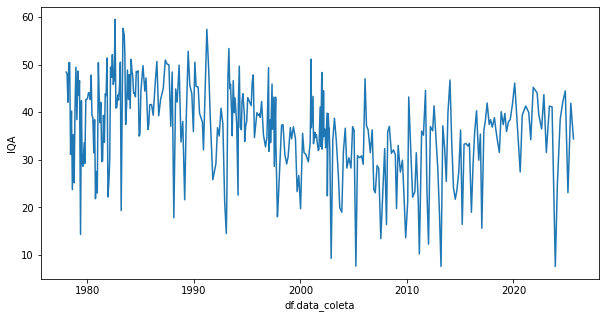

In [48]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='df.data_coleta', y='IQA')
plt.show()

<Figure size 720x432 with 0 Axes>

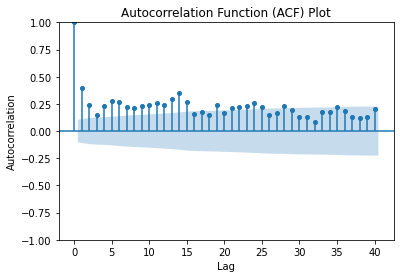

In [ ]:
#Autocorrelation Function

plt.figure(figsize=(10, 6))
plot_acf(iqa, lags=40, markersize=4)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

- Autocorrelação majoritariamente baixa -> o tempo não tem influência forte nos dados.
- Valores fora da mancha azul:estatisticamente significativos 
- Valores dentro da mancha azul> intervalo de confiança em que a autocorrelação pode ser considerada igaul a zero

### Teste de Dickey-Fuller

In [50]:
result = adfuller(iqa)
print(result)

#H0: Não é estacionária
#H1: Estacionária
# Se p<0.05 (segundo valor) rejeita-se H0

(-1.8152444402446526, 0.37291994702158193, 13, 337, {'1%': -3.4499043309021955, '5%': -2.870154885338925, '10%': -2.5713597190254385}, 2348.4234423916823)


### Teste de Durbin-Watson

In [51]:
#Varia de 0 a 4. Quanto mais perto de 2, menor a correlação temporal. 
# Menor do que 2 -> correlação temporal positiva

# Converte datetime para número de dias
X = df['df.data_coleta'].map(lambda x: x.toordinal())
y = df['IQA'].astype(float)

X = sm.add_constant(X)  
reg = sm.OLS(y, X).fit()

durbin_watson(resids=np.array(reg.resid))

1.3744419811551318

### Teste de Breusch-Godfrey

In [52]:
#H0: Não é série temporal
#H1: É série temporal
# se p-value menor que 0.05 -> rejeita-se H0

bg_test = acorr_breusch_godfrey(reg, nlags=40)

print('LM Statistic:', bg_test[0])
print('LM Test p-value:', bg_test[1])

LM Statistic: 86.49594108342816
LM Test p-value: 2.8508096400491365e-05


# PCA 2192

In [53]:
df = pd.read_csv('C:/Users/tiago/Desktop/Mestrado/Segundo Semestre/IA_LEB/projeto_final/df2192.csv')

In [54]:
df['df.data_coleta'] = pd.to_datetime(df['df.data_coleta'], format='%Y-%m-%d')
iqa = df[['IQA']]

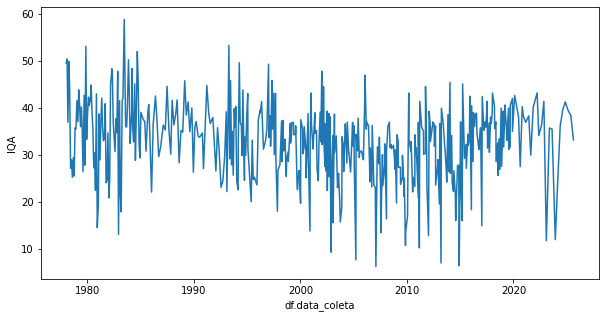

In [55]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='df.data_coleta', y='IQA')
plt.show()

<Figure size 720x432 with 0 Axes>

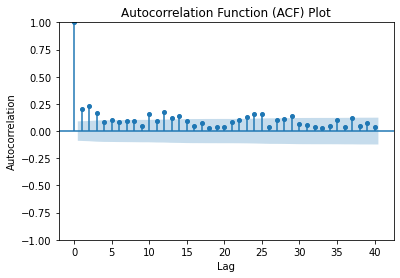

In [56]:
#Autocorrelation Function

plt.figure(figsize=(10, 6))
plot_acf(iqa, lags=40, markersize=4)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()   

#Autocorrelação majoritariamente baixa -> o tempo não tem influência forte nos dados.
#Valores fora da mancha azul:estatisticamente significativos 
#Valores dentro da mancha azul> intervalo de confiança em que a autocorrelação pode ser considerada igaul a zero

### Teste de Dickey-Fuller

In [57]:
result = adfuller(iqa)
print(result)

#H0: Não é estacionária
#H1: Estacionária
# Se p<0.05 (segundo valor) rejeita-se H0

(-9.207278814925598, 1.929663179005552e-15, 2, 477, {'1%': -3.444133731419755, '5%': -2.8676183066831036, '10%': -2.5700075029117166}, 3212.208827583763)


### Teste de Durbin-Watson

In [58]:
#Varia de 0 a 4. Quanto mais perto de 2, menor a correlação temporal. 
# Menor do que 2 -> correlação temporal positiva

# Converte datetime para número de dias
X = df['df.data_coleta'].map(lambda x: x.toordinal())
y = df['IQA'].astype(float)

X = sm.add_constant(X)  
reg = sm.OLS(y, X).fit()

durbin_watson(resids=np.array(reg.resid))

1.6495548071320398

### Teste de Breusch-Godfrey

In [59]:
#H0: Não é série temporal
#H1: É série temporal
# se p-value menor que 0.05 -> rejeita-se H0

bg_test = acorr_breusch_godfrey(reg, nlags=40)

print('LM Statistic:', bg_test[0])
print('LM Test p-value:', bg_test[1])

LM Statistic: 65.81479353841608
LM Test p-value: 0.006219056571967307


# PCA 2800

In [60]:
df = pd.read_csv('C:/Users/tiago/Desktop/Mestrado/Segundo Semestre/IA_LEB/projeto_final/df2800.csv')

In [61]:
df['df.data_coleta'] = pd.to_datetime(df['df.data_coleta'], format='%Y-%m-%d')
iqa = df[['IQA']]

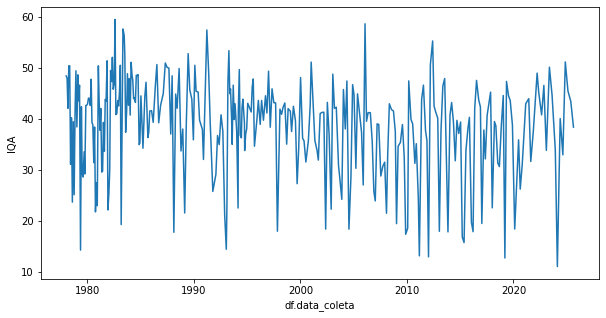

In [62]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='df.data_coleta', y='IQA')
plt.show()

<Figure size 720x432 with 0 Axes>

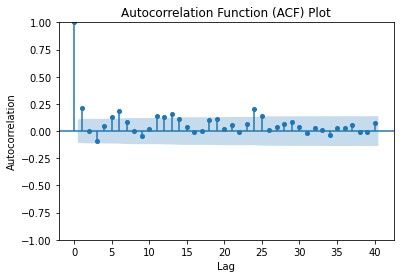

In [63]:
#Autocorrelation Function

plt.figure(figsize=(10, 6))
plot_acf(iqa, lags=40, markersize=4)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()   

#Autocorrelação majoritariamente baixa -> o tempo não tem influência forte nos dados.
#Valores fora da mancha azul:estatisticamente significativos 
#Valores dentro da mancha azul> intervalo de confiança em que a autocorrelação pode ser considerada igaul a zero

### Teste de Dickey-Fuller

In [64]:
result = adfuller(iqa)
print(result)

#H0: Não é estacionária
#H1: Estacionária
# Se p<0.05 (segundo valor) rejeita-se H0

(-5.544595163815031, 1.6719140585571054e-06, 5, 322, {'1%': -3.4508226600665037, '5%': -2.870558121868621, '10%': -2.571574731684734}, 2236.5586478984083)


### Teste de Durbin-Watson

In [65]:
#Varia de 0 a 4. Quanto mais perto de 2, menor a correlação temporal. 
# Menor do que 2 -> correlação temporal positiva

# Converte datetime para número de dias
X = df['df.data_coleta'].map(lambda x: x.toordinal())
y = df['IQA'].astype(float)

X = sm.add_constant(X)  
reg = sm.OLS(y, X).fit()

durbin_watson(resids=np.array(reg.resid))

1.6463412291554167

### Teste de Breusch-Godfrey

In [66]:
#H0: Não é série temporal
#H1: É série temporal
# se p-value menor que 0.05 -> rejeita-se H0

bg_test = acorr_breusch_godfrey(reg, nlags=40)

print('LM Statistic:', bg_test[0])
print('LM Test p-value:', bg_test[1])

LM Statistic: 59.92201077643569
LM Test p-value: 0.022224612645818428
